In [2]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Web Scraping and Analysis

This Jupyter notebook demonstrates web scraping using Python. The data will be collected with the help of the **BeautifulSoup** package. Once the data is gathered and saved into a local `.csv` file, the next step is to perform an analysis on it.

### Scraping Data from Skytrax

The focus is on reviews related to **British Airways** from the **Skytrax** website. If you visit [https://www.airlinequality.com], you'll find a vast amount of data. For this task, the goal is to extract reviews specifically about British Airways and the airline itself.

To collect the data, navigate to the following link: [https://www.airlinequality.com/airline-reviews/british-airways]. On this page, the review data is available. Using **Python** and **BeautifulSoup**, all the review links will be collected, and the text data from each individual review will be scraped.


In [4]:
# Step 1: Web Scraping (Already covered in your code)
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100
reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

### Rule-based Approach

The rule-based approach is a practical method for analyzing text without the need for training or machine learning models. This approach relies on a set of predefined rules, known as lexicons, to categorize text as positive, negative, or neutral. This is why the rule-based approach is also referred to as the lexicon-based approach.

Common lexicon-based methods include **TextBlob**, **VADER**, and **SentiWordNet**.

### Data Preprocessing Steps

The typical data preprocessing steps involved in this approach are:

1. **Text Cleaning**: Removing unnecessary or irrelevant characters and formatting.
2. **Tokenization**: Splitting the text into smaller units, such as words or phrases.
3. **Enrichment (POS Tagging)**: Assigning part-of-speech labels to each token to understand the role of each word in the text.
4. **Stopwords Removal**: Eliminating common words (such as "and," "the," etc.) that don't carry significant meaning for analysis.
5. **Stemming**: Reducing words to their root or base form for further analysis.


In [5]:
# Step 2: Clean the Data
df = pd.DataFrame()
df["reviews"] = reviews
df['reviews'] = df['reviews'].str.split('|',expand=True)[1]  # Removing unwanted text before |

# Function to clean text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)

In [6]:
df.head()

,reviews,Cleaned Reviews
0,"Disappointing service, plane interior and t...",Disappointing service plane interior and terr...
1,A transit visa is required for my partner t...,A transit visa is required for my partner to ...
2,I was surprised to receive confirmation pre...,I was surprised to receive confirmation pre f...
3,"Flight cancelled, not refunding our money s...",Flight cancelled not refunding our money sayi...
4,"I had visa issues, and hence, was debarred ...",I had visa issues and hence was debarred from...


In [9]:
nltk.download('all')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [10]:
# Step 3: Tokenization, POS tagging, and Lemmatization

pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

# Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos) if pos else word
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)

# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [11]:
# Step 4: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# Sentiment categorization
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)

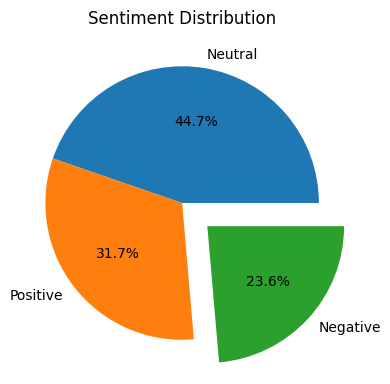

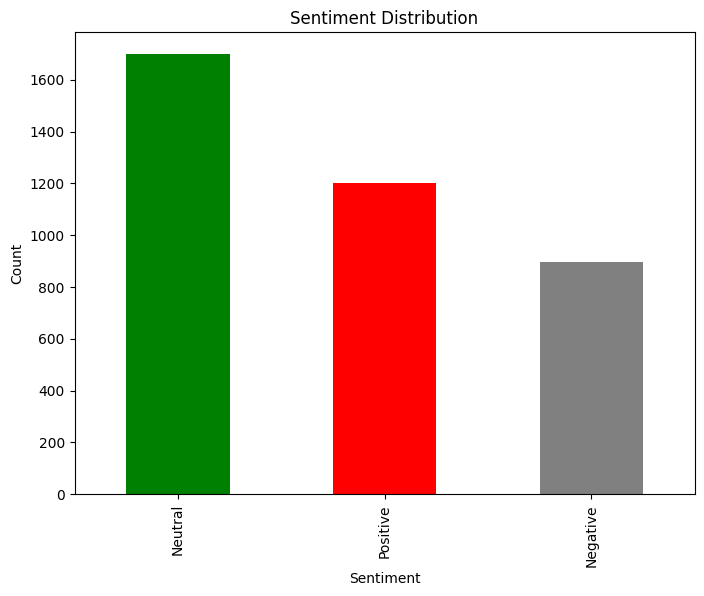

Top Positive Reviews:
2        I was surprised to receive confirmation pre...
5        Singapore to Heathrow with BA. Two choices ...
8      The flight wasn’t that bad, although the Infl...
10      I was very impressed with their efficient bo...
12       I have been flying BA for over 15 years. I ...
Name: reviews, dtype: object
Top Negative Reviews:
0       Disappointing service, plane interior and t...
3       Flight cancelled, not refunding our money s...
4       I had visa issues, and hence, was debarred ...
6       I recently travelled from Munich to London ...
7      I paid for seats 80 A and B on my flight fro...
Name: reviews, dtype: object


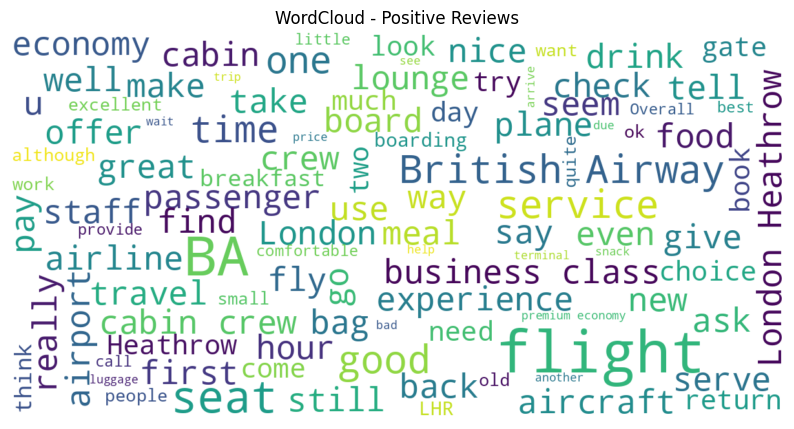

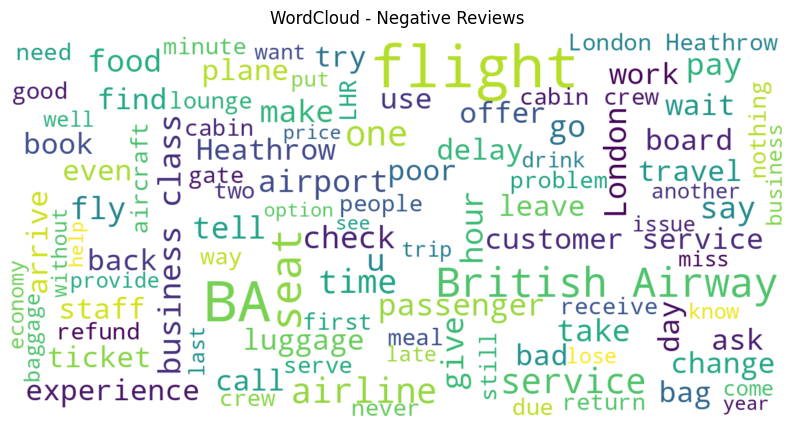

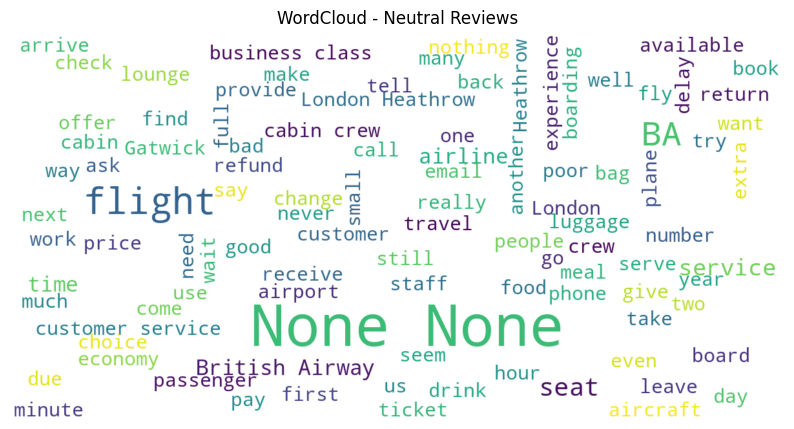

In [12]:
# Step 5: Visualizations
# Sentiment Distribution Pie Chart
vader_counts = df['Analysis'].value_counts()
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Sentiment Distribution")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

# Sentiment Distribution Bar Chart
plt.figure(figsize=(8,6))
vader_counts.plot(kind='bar', color=['green', 'red', 'gray'], title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Top Positive and Negative Reviews
top_positive_reviews = df[df['Analysis'] == 'Positive']['reviews'].head(5)
top_negative_reviews = df[df['Analysis'] == 'Negative']['reviews'].head(5)

print("Top Positive Reviews:")
print(top_positive_reviews)

print("Top Negative Reviews:")
print(top_negative_reviews)

# Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['Analysis'] == 'Positive']['Lemma'])
wordcloud_positive = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=30, scale=3).generate(positive_reviews)
plt.figure(figsize=(10, 10))
plt.title("WordCloud - Positive Reviews")
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.show()

# Word Cloud for Negative Reviews
negative_reviews = ' '.join(df[df['Analysis'] == 'Negative']['Lemma'])
wordcloud_negative = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=30, scale=3).generate(negative_reviews)
plt.figure(figsize=(10, 10))
plt.title("WordCloud - Negative Reviews")
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.show()

# Word Cloud for Neutral Reviews
neutral_reviews = ' '.join(df[df['Analysis'] == 'Neutral']['Lemma'])
wordcloud_neutral = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=30, scale=3).generate(neutral_reviews)
plt.figure(figsize=(10, 10))
plt.title("WordCloud - Neutral Reviews")
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis('off')
plt.show()

# Save the cleaned reviews and sentiments to a CSV file
df.to_csv("data.csv")

